In [16]:
pip install seaborn spacy

You should consider upgrading via the 'C:\Users\yemia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.



  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     --------------------------------------- 12.3/12.3 MB 14.6 MB/s eta 0:00:00
     ---------------------------------------- 7.5/7.5 MB 25.2 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 KB 2.2 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 KB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 19.8 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 KB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 KB 2.4 MB/s eta 0:00:00
     ------------------------------------- 483.6/483.6 KB 15.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18.8 MB/s eta 0:00:00
  Using cached contourpy-1.1.0-cp39-cp39-win_amd64.whl (429 kB)
     ---------------------------------------- 2.1/2.1 MB 22.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached pypa

In [4]:
import pandas as pd

In [5]:
# Load the data
data = pd.read_csv('sent_train.csv')
data.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [11]:
data['label'].describe()

count    9543.000000
mean        1.496280
std         0.743139
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: label, dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


In [14]:
data.shape

(9543, 2)

# Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

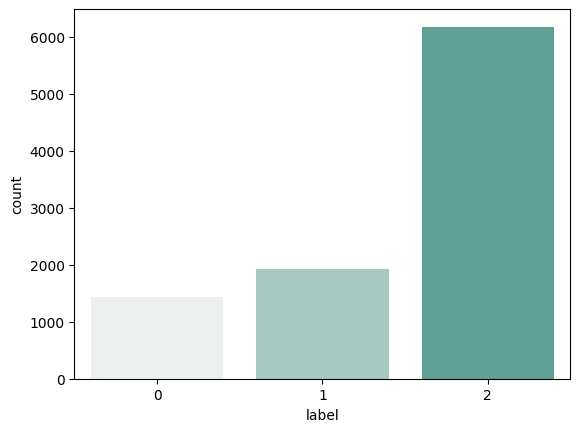

In [18]:
import seaborn as sns
sns.countplot(data=data, x='label', palette='light:#5A9')

In [20]:
data['label'].value_counts()

label
2    6178
1    1923
0    1442
Name: count, dtype: int64

From the graph above we can see that the data is not balanced. the label 2 has 3 times as much data samples as 0 and 1 
So, we have a total of 9543 records, broken down as follows:

2(Neutral)     6178
1(Positive)    1923
0(Negative)    1442

This dataset would benefit from a rebalancing to make each class of sentiment have roughly the same number of samples

In order to do this, we would make the reduce both the Number of neutral sentiments and that of positive sentiment to be about 1500, each. Bringing the distribution of data to 
2(Neutral)     1500
1(Positive)    1500
0(Negative)    1442
Total          4442

label
1    1500
2    1500
0    1442
Name: count, dtype: int64

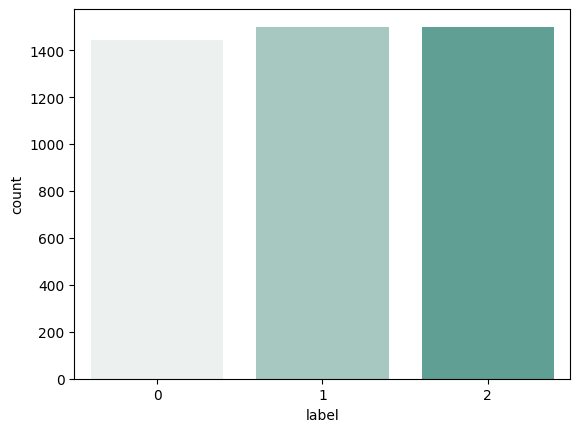

In [24]:
# Separate data for each label
label_0_data = data[data['label'] == 0]
label_1_data = data[data['label'] == 1].sample(n=1500, random_state=42)
label_2_data = data[data['label'] == 2].sample(n=1500, random_state=42)

# Concatenate the balanced data
balanced_data = pd.concat([label_0_data, label_1_data, label_2_data])

# Shuffle the balanced data
balanced_data = balanced_data.sample(frac=1, random_state=42)

sns.countplot(data=balanced_data, x='label', palette='light:#5A9')
balanced_data['label'].value_counts()

# Feasture Engineering 
The data has now been balanced. 

In [27]:
#import spacy
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 23.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\yemia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [28]:
# Using Spacy to delete stop_words
nlp = spacy.load('en_core_web_sm')
stop_words=nlp.Defaults.stop_words

In [31]:
import gensim
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [33]:
print(gensim.downloader.info()['models']['fasttext-wiki-news-subwords-300'])

{'num_records': 999999, 'file_size': 1005007116, 'base_dataset': 'Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)', 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/__init__.py', 'license': 'https://creativecommons.org/licenses/by-sa/3.0/', 'parameters': {'dimension': 300}, 'description': '1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).', 'read_more': ['https://fasttext.cc/docs/en/english-vectors.html', 'https://arxiv.org/abs/1712.09405', 'https://arxiv.org/abs/1607.01759'], 'checksum': 'de2bb3a20c46ce65c9c131e1ad9a77af', 'file_name': 'fasttext-wiki-news-subwords-300.gz', 'parts': 1}


In [34]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [36]:
print(type(wv))

<class 'gensim.models.keyedvectors.KeyedVectors'>


Now We define the functiont oconvert the words in a sentance into vectors and take average of all these vectors so that the dimension of all the sentences is 300x1.

In [45]:
import numpy as np
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    count = 1
    for word in sent:
        if word in wv:
            count+=1
            wv_res = wv[word]
    wv_res = wv_res/count # taking the average
    return wv_res

Below i will write a preprocessing function that i will use in preproccessing the text data to make it suitable for NLP. The funciton will remove urls, special characters, and numbers from the text. it will perform lemmatization, and convert the text to tokens. 

In [38]:
import re
def preprocess(text):
    # Removing the numbers, special characters, etc from the sentence and replacing them with " "
    #text = re.sub('[^a-zA-Z]',' ',text)
    text  = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\$[A-Za-z]+', '', text)  # Remove stock symbols
    text = re.sub(r'\W+', ' ', text)
    # Converting sentence into a spacy doc - which is a sequence of tokens
    doc = nlp(text)
    # Lemmatization and lower casing the words
    tokens = [word.lemma_.lower().strip() for word in doc]
    # Removing stop words and punctuations
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [39]:
# Step-1 : Converting Sentences into tokens
balanced_data['tokens'] = balanced_data['text'].apply(preprocess)
balanced_data.head()

,text,label,tokens
3504,"Results: Jack Henry & Associates, Inc. Exceede...",1,"[result, jack, henry, associates, inc, exceed,..."
6379,October Housing Starts Maintain Solid Upward T...,1,"[october, housing, start, maintain, solid, upw..."
5581,"Feb. gold climbs by 10 cents, or 0.01%, to set...",1,"[feb, gold, climb, 10, cent, 0, 01, settle, 1,..."
5017,Recommending life insurance doesn’t have to be...,2,"[recommend, life, insurance, doesn, t, complic..."
6176,Canadian Business Optimism Was Fading Before P...,0,"[canadian, business, optimism, fade, pandemic,..."


In [46]:
# Step-2 : Converting each record into 300x1 dimension vector
balanced_data['vectors'] = balanced_data['tokens'].apply(sent_vec)
balanced_data.head()

,text,label,tokens,vectors
3504,"Results: Jack Henry & Associates, Inc. Exceede...",1,"[result, jack, henry, associates, inc, exceed,...","[0.00017270175, -0.010653409, 0.016867898, 0.0..."
6379,October Housing Starts Maintain Solid Upward T...,1,"[october, housing, start, maintain, solid, upw...","[0.0077209473, -0.0035552979, -0.03100586, 0.0..."
5581,"Feb. gold climbs by 10 cents, or 0.01%, to set...",1,"[feb, gold, climb, 10, cent, 0, 01, settle, 1,...","[-0.04405382, -0.021267362, 0.0101454, 0.03125..."
5017,Recommending life insurance doesn’t have to be...,2,"[recommend, life, insurance, doesn, t, complic...","[0.0029296875, -0.015950521, 0.0033162434, -0...."
6176,Canadian Business Optimism Was Fading Before P...,0,"[canadian, business, optimism, fade, pandemic,...","[0.008029514, -0.011013455, -0.005750868, 0.01..."


In [47]:
balanced_data['vectors'][0].shape

(300,)

In [48]:
X = balanced_data['vectors'].to_list()
y = balanced_data['label'].to_list()

In [53]:
# Defining a function to train_test_split evenly acros the three sentiment classes. 
from sklearn.model_selection import train_test_split

def even_train_test_split(X, y, test_size=0.2, random_state=None):
    
    y = pd.Series(y)
    X = pd.DataFrame(X)
    
    # Get the unique classes in the target variable
    classes = sorted(y.unique())

    # Split the data for each class separately
    X_train, X_test, y_train, y_test = [], [], [], []
    for class_label in classes:
        X_class = X[y == class_label]
        y_class = y[y == class_label]

        X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
            X_class, y_class, test_size=test_size, random_state=random_state, stratify=y_class
        )

        X_train.append(X_train_class)
        X_test.append(X_test_class)
        y_train.append(y_train_class)
        y_test.append(y_test_class)

    # Concatenate the data for all classes
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
    y_train = pd.concat(y_train)
    y_test = pd.concat(y_test)

    return X_train, X_test, y_train, y_test

In [56]:
y_train

3107    0
3561    0
547     0
1554    0
534     0
       ..
1276    2
1031    2
1509    2
1713    2
25      2
Length: 3553, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = even_train_test_split(X, y, test_size=0.2, random_state=42)

class_counts = y_train.value_counts()
print(class_counts)


1    1200
2    1200
0    1153
Name: count, dtype: int64


In [62]:
pip install catboost xgboost

     -------------------------------------- 101.0/101.0 MB 5.2 MB/s eta 0:00:00
     --------------------------------------- 15.5/15.5 MB 12.8 MB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 KB 584.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\yemia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [63]:
pip install xgboost

     --------------------------------------- 70.9/70.9 MB 14.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\yemia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [78]:
# Models Libraries
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [65]:
# Defining a library for all models functions and types i want to use in training my data. I then compared the result of each model to select the best model to use.
models = {
    "Logistic Regression" : LogisticRegression(),
    "SVM" : SVC(),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "KNN" : KNeighborsClassifier(),
    "SGD" : SGDClassifier(),
    "XgBoost" : XGBClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "CatBoost" : CatBoostClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier()
}

In [66]:
# here i defined the hyper parameters for each model type i am going to use in training my data.  
params = {
    "Logistic Regression" : {
        "C" : [100, 10, 1.0, 0.1, 0.01],
        "penalty" : ['l1', 'l2']
    },
    "SVM" : {
        "C" : [0.1, 1, 10, 100, 1000], 
        "gamma" : [1, 0.1, 0.01, 0.001, 0.0001],
        "kernel" : ['rbf']
    },
    "Naive Bayes" : {
        "var_smoothing" : np.logspace(0,-9, num=100)
    },
    "Decision Tree" : {
        "max_depth" : [3, 4, 5, 10, 15]
    },
    "Random Forest" : {
        "n_estimators" : [100, 200, 300, 400],
        "max_depth" : [3, 5, 10],
        "min_samples_leaf" : [1, 2, 4]
    },
    "KNN" : {
        'n_neighbors' : [5, 7, 9, 11, 13, 15],
        'weights' : ['uniform', 'distance'],
        'metric' : ['minkowski', 'euclidean', 'manhattan']
    },
    "SGD" : {
        "penalty" : ['l1', 'l2', 'elasticnet'],
        "alpha" : [0.0001, 0.001, 0.01, 0.1]
    },
    "XgBoost" : {
        "learning_rate" : [0.001, 0.01, 0.1, 1]
    },
    "AdaBoost" : {
        "learning_rate" : [0.001, 0.01, 0.1, 1]
    },
    "CatBoost" : {
        "learning_rate" : [0.001, 0.01, 0.1, 1]
    },
    "Gradient Boosting" : {
        "learning_rate" : [0.001, 0.01, 0.1, 1],
        "n_estimators" : [100, 200]
    }
}

In [67]:
# here i define a function that evaluate the differnt types of model with the dataset. I obtained the accuracy scores and compared them to select the best. 
def evaluate_models(X_train, y_train, X_test, y_test, models, param):
    report = {}
    for i in range(len(list(models))):
        model = list(models.values())[i]
        para = param[list(models.keys())[i]]

        gs = GridSearchCV(model, para, cv=3)
        gs.fit(X_train, y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_model_score = accuracy_score(y_train, y_train_pred)
        test_model_score = accuracy_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = test_model_score

    return report

In [68]:
model_report: dict = evaluate_models(
                X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, models=models, param=params)
# Model Report Containing the accuracies of all the models
print(model_report)

C:\Users\yemia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yemia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

0:	learn: 1.0985179	total: 250ms	remaining: 4m 9s
1:	learn: 1.0984535	total: 369ms	remaining: 3m 3s
2:	learn: 1.0983480	total: 486ms	remaining: 2m 41s
3:	learn: 1.0982414	total: 587ms	remaining: 2m 26s
4:	learn: 1.0981252	total: 699ms	remaining: 2m 19s
5:	learn: 1.0980070	total: 797ms	remaining: 2m 12s
6:	learn: 1.0979245	total: 894ms	remaining: 2m 6s
7:	learn: 1.0978225	total: 999ms	remaining: 2m 3s
8:	learn: 1.0977062	total: 1.1s	remaining: 2m 1s
9:	learn: 1.0976117	total: 1.2s	remaining: 1m 58s
10:	learn: 1.0974885	total: 1.3s	remaining: 1m 56s
11:	learn: 1.0973889	total: 1.4s	remaining: 1m 55s
12:	learn: 1.0972737	total: 1.51s	remaining: 1m 55s
13:	learn: 1.0971739	total: 1.64s	remaining: 1m 55s
14:	learn: 1.0970800	total: 1.78s	remaining: 1m 57s
15:	learn: 1.0969749	total: 1.91s	remaining: 1m 57s
16:	learn: 1.0968729	total: 2.02s	remaining: 1m 56s
17:	learn: 1.0967787	total: 2.13s	remaining: 1m 56s
18:	learn: 1.0966386	total: 2.24s	remaining: 1m 55s
19:	learn: 1.0965347	total: 2.3

In [69]:
# To get best model score from dict
best_model_score = max(sorted(model_report.values()))
# To get best model name from dict
best_model_name = list(model_report.keys())[
    list(model_report.values()).index(best_model_score)
]
best_model = models[best_model_name]
print(best_model)

In [70]:
# Predicting with the best model
y_pred = best_model.predict(X_test)

In [76]:
#print([y_pred,X_test])

In [74]:
# Accuracy of the best model
accuracy_score(y_test, y_pred)

0.5230596175478065

In [75]:
# Confusion Matrix of the Best Model
confusion_matrix(y_test, y_pred)

array([[118,  87,  84],
       [ 59, 164,  77],
       [ 64,  53, 183]], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.41      0.45       289
           1       0.54      0.55      0.54       300
           2       0.53      0.61      0.57       300

    accuracy                           0.52       889
   macro avg       0.52      0.52      0.52       889
weighted avg       0.52      0.52      0.52       889



# Validating the classifier model with validation dataset.

In [82]:
# Load the data
val_data = pd.read_csv('sent_valid.csv')
val_data.head()

,text,label
0,$ALLY - Ally Financial pulls outlook https://t...,0
1,"$DELL $HPE - Dell, HPE targets trimmed on comp...",0
2,$PRTY - Moody's turns negative on Party City h...,0
3,$SAN: Deutsche Bank cuts to Hold,0
4,$SITC: Compass Point cuts to Sell,0


<Axes: xlabel='label', ylabel='count'>

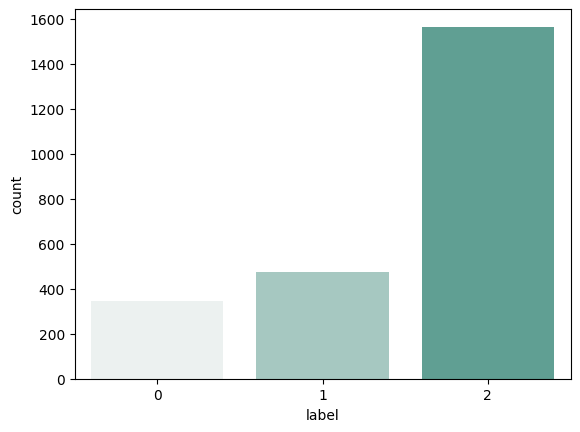

In [83]:
sns.countplot(data=val_data, x='label', palette='light:#5A9')

In [84]:
# Step-1 : Converting Sentences into tokens
val_data['tokens'] = val_data['text'].apply(preprocess)
# Step-2 : Converting each record into 300x1 dimension vector
val_data['vectors'] = val_data['tokens'].apply(sent_vec)
val_data.head()

,text,label,tokens,vectors
0,$ALLY - Ally Financial pulls outlook https://t...,0,"[, ally, financial, pull, outlook]","[-0.021289062, 0.00834961, 0.0075683594, 0.029..."
1,"$DELL $HPE - Dell, HPE targets trimmed on comp...",0,"[, dell, hpe, target, trim, compute, headwind]","[-0.044270832, 0.040364582, -0.048177082, 0.00..."
2,$PRTY - Moody's turns negative on Party City h...,0,"[, moody, s, turn, negative, party, city]","[-0.0014386858, 0.00819615, 0.02622768, -0.005..."
3,$SAN: Deutsche Bank cuts to Hold,0,"[, deutsche, bank, cut, hold]","[0.0024902343, -0.010644531, 0.026953125, 0.00..."
4,$SITC: Compass Point cuts to Sell,0,"[, compass, point, cut, sell]","[0.02060547, -0.034179688, -0.031640626, 0.025..."


In [85]:
X_val = val_data['vectors'].to_list()
y_val = val_data['label'].to_list()

In [86]:
# Predicting with the best model
y_pred_val = best_model.predict(X_val)

In [88]:
# Accuracy of the best model
# Model evaluation
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {val_accuracy:.2f}")
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.27      0.44      0.33       347
           1       0.35      0.48      0.41       475
           2       0.82      0.62      0.70      1566

    accuracy                           0.56      2388
   macro avg       0.48      0.51      0.48      2388
weighted avg       0.65      0.56      0.59      2388

[[154 116  77]
 [118 227 130]
 [301 300 965]]


In [ ]:
# Saving the model
# save the model to disk
filename = 'finalized_model.pickle'
pickle.dump(best_model, open(filename, 'wb'))